<br>
<br>
<h1><center> Risk Sensitivity and Theory of Mind in Human Coordination</h1></center>

<center>Pedro L. Ferreira$^1$, Francisco C. Santos$^1$, Sérgio Pequito$^2$</center>
<br>
<center>$^1$INESC-ID and Instituto Superior Técnico,  Universidade de Lisboa,  2744-016 Porto Salvo,Portugal</center>
<center>$^2$Delft Center for Systems and Control,  Technische Universiteit Delft,  Mekelweg 22628 CDDelft, Netherlands</center>
<hr>

<center><h1>Singleplayer Experiments with Cumulative Prospect Theory</center>
<br>

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
import string

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

mpl.rcParams['axes.formatter.min_exponent'] = 10

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

<hr>
<br>
<br>
<center><h2> Utility Function </h2></center>
<br>

In [ ]:
def u_plus(o,power=0.85):
    return o**power
def u_minus(o,power=0.85,loss_aversion=2):
    return -loss_aversion*np.abs(o)**power

def u(o,power=0.85,loss_aversion=2):
    if o >= 0:
        return u_plus(o,power)
    else:
        return u_minus(o,power,loss_aversion)

<hr>
<br>
<br>
<center><h2> Probability Weighting Functions </h2></center>
<br>

In [5]:
def w_original(p,gamma=0.75):
    return p**gamma/((p**gamma + (1-p)**gamma)**(1/gamma))
    
def w(p,alpha,delta=0.75):
    return np.exp(-alpha*(-np.log(p))**delta)

<hr>
<br>
<br>
<center><h2> Figure 1 of the Manuscript </h2></center>
<br>
<center>Utility Functions, Probability Distortion Function, and Possibility/Certainty Effects</center>

<ipython-input-5-ec83e2581946>:5: RuntimeWarning: divide by zero encountered in log
  return np.exp(-alpha*(-np.log(p))**delta)
<ipython-input-5-ec83e2581946>:5: RuntimeWarning: divide by zero encountered in log
  return np.exp(-alpha*(-np.log(p))**delta)
<ipython-input-5-ec83e2581946>:5: RuntimeWarning: divide by zero encountered in log
  return np.exp(-alpha*(-np.log(p))**delta)
<ipython-input-13-59b5caceb706>:29: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0,0.25,0.5,0.75,1], [str(t) for t in [0,0.25,0.5,0.75,1]])
<ipython-input-13-59b5caceb706>:30: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([0,0.25,0.5,0.75,1], [str(t) for t in [0,0.25,0.5,0.75,1]])
<ipython-input-5-e

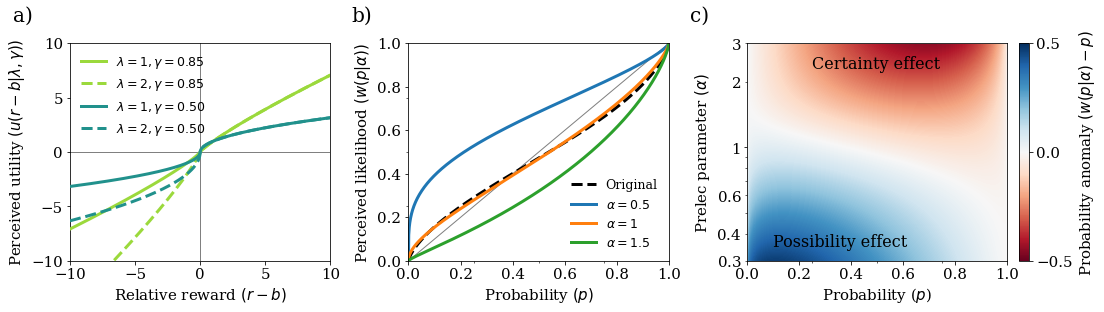

In [13]:
os = np.linspace(-10,10,1000)
powers = [0.85,0.5]

cm = plt.get_cmap("viridis")

f,axes = plt.subplots(1,3,figsize=(20,4))

ax = axes[0]
ax.plot(os,[u(o,power=0.85,loss_aversion=1) for o in os],lw=3,label=r"$\lambda=1, \gamma=0.85$",c=cm(0.85),zorder=100)
ax.plot(os,[u(o,power=0.85,loss_aversion=2) for o in os],lw=3,label=r"$\lambda=2, \gamma=0.85$", ls="dashed",c=cm(0.85))
ax.plot(os,[u(o,power=0.50,loss_aversion=1) for o in os],lw=3,label=r"$\lambda=1, \gamma=0.50$",c=cm(0.5),zorder=100)
ax.plot(os,[u(o,power=0.50,loss_aversion=2) for o in os],lw=3,label=r"$\lambda=2, \gamma=0.50$", ls="dashed",c=cm(0.5),zorder=100)
ax.plot([os[0],os[-1]],[0,0],c="grey",zorder=1,lw=1)
ax.plot([0,0],[os[0],os[-1]],c="grey",zorder=1,lw=1)
ax.set_xlabel(r"Relative reward $(r-b)$")
ax.set_ylabel(r"Perceived utility $(u(r-b|\lambda,\gamma))$")
ax.set_xlim(os[0],os[-1])
ax.set_ylim(os[0],os[-1])
ax.legend(fontsize="small",frameon=False)

ax = axes[1]
alphas = [0.5,1,1.5]
ax.plot(np.linspace(0,1,1000),w_original(np.linspace(0,1,1000)),label="Original",c="k",ls="dashed",lw=3)
for i,a in enumerate(alphas):
    ax.plot(np.linspace(0,1,1000),w(np.linspace(0,1,1000),a),label=r"$\alpha="+str(round(a,2))+"$",lw=3)
ax.plot(np.linspace(0,1,1000),np.linspace(0,1,1000),c="grey",zorder=1,lw=1)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks([0,0.25,0.5,0.75,1], [str(t) for t in [0,0.25,0.5,0.75,1]])
ax.set_yticks([0,0.25,0.5,0.75,1], [str(t) for t in [0,0.25,0.5,0.75,1]])
ax.set_xlabel(r"Probability $(p)$")
ax.set_ylabel(r"Perceived likelihood $(w(p|\alpha))$")
ax.legend(fontsize="small",frameon=False,ncol=1)

alphas = np.linspace(0.3,3,1000)
ps = np.linspace(0,1,1000)
ws = np.zeros((len(alphas),len(ps)))
for i,p in enumerate(ps):
    for j,a in enumerate(alphas):
        ws[j,i] = w(p,a)-p

ax = axes[2]
alphas = np.linspace(0.3,3,1000)
extent = [0,1,alphas[0],alphas[-1]]
im= ax.imshow(ws,origin="lower",extent=extent,aspect="auto",cmap="RdBu",vmin=-0.5,vmax=0.5)
f.subplots_adjust(wspace=0.3)
cb = f.colorbar(im, ax=axes.ravel().tolist(),orientation="vertical",label=r"Probability anomaly $(w(p|\alpha) - p)$",pad=0.01)
cb.set_ticks([-0.5,0,0.5],["-0.5","0","0.5"])
ax.text(0.25,2.3,"Certainty effect",color="k",size=16)
ax.text(0.1,0.35,"Possibility effect",color="k",size=16)
ax.set_yscale("log")
ax.set_ylabel(r"Prelec parameter $(\alpha)$")
ax.set_xlabel(r"Probability ($p$)")
xticks = [0,0.25,0.5,0.75,1]
ax.set_xticks(xticks,[str(t) for t in xticks])

for n,ax in enumerate(axes.flatten()):
    ax.text(-0.22, 1.1, string.ascii_lowercase[n]+")", transform=ax.transAxes, size=20)
plt.savefig("Risk Sensitivity/PT_description.pdf",bbox_inches='tight')
plt.show()

<hr>
<br>
<br>
<center><h2>Figure 2 of the Manuscript</h2></center>
<br>
<center>Cumulative Prospect Theory value difference in 4 different scenarios</center>

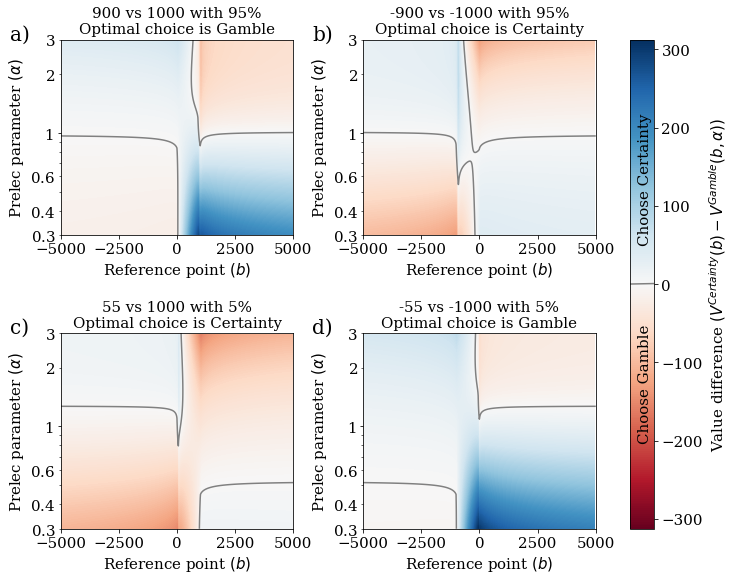

In [4]:
b_lims = [-5000, 5000]
a_lims = [0.3,3]

def gamble(certain_r, largest_r, p_of_largest_r, lowest_r):
    p = p_of_largest_r
    
    bs = np.linspace(*b_lims,1000)
    alphas = np.linspace(*a_lims,1000)
#     alphas = np.logspace(-1,1,100)

    dV = np.zeros((len(bs),len(alphas)))

    for i,b in enumerate(bs):
        V_CPT_certain   = u(certain_r-b)
        for j,a in enumerate(alphas):
            V_CPT_uncertain = 0
            
            # Value of larger outcome
            psi = w_prelec(p,a) if largest_r-b>0 else 1-w_prelec(1-p,a)
            V_CPT_uncertain += u(largest_r-b)*psi

            # Value of smaller outcome
            psi = 1-w_prelec(p,a) if lowest_r-b>0 else w_prelec(1-p,a)
            V_CPT_uncertain += u(lowest_r-b)*psi

            dV[i,j] = V_CPT_certain - V_CPT_uncertain
    
    return dV

extent = [*b_lims,*a_lims]


decision_high_gain = gamble(900,1000,0.95,0)    # certainty  900 vs  1000 with probability 95%. Optimal choice is ‘Gamble’ since 1000×95% = 950>900.
decision_high_loss = gamble(-900,0,0.05,-1000)  # certainty -900 vs -1000 with probability 95%. Optimal choice is Certainty since −1000×95% =−950<−900
decision_low_gain  = gamble(55,1000,.05,0)      # certainty   55 vs  1000 with probability 5%.  Optimal choice is ‘Certainty’ since 1000×5% = 50<55.
decision_low_loss  = gamble(-55,0,0.95,-1000)   # certainty  -55 vs -1000 with probability 5%.  Optimal choice is Gamble since −1000×5% =−50>−55.


f,axes = plt.subplots(2,2,figsize=(12,9))

vmin = np.min([-np.max(np.abs(decision_high_gain)),-np.max(np.abs(decision_high_loss)),-np.max(np.abs(decision_low_gain)),-np.max(np.abs(decision_low_loss))])
vmax = np.max([np.max(np.abs(decision_high_gain)),np.max(np.abs(decision_high_loss)),np.max(np.abs(decision_low_gain)),np.max(np.abs(decision_low_loss))])

cmap="RdBu"
xticks = [-5000,-2500,0,2500,5000]

ax = axes[0,0]
ax.imshow(decision_high_gain.T, origin="lower", extent=extent, cmap=cmap,aspect="auto",vmin=vmin,vmax=vmax)
ax.contour(decision_high_gain.T,levels=0,extent=extent,colors="grey",linestyles="solid")
ax.set_title("900 vs 1000 with 95%\nOptimal choice is Gamble",fontdict={"fontsize":15})
ax.set_yscale("log")
ax.set_xlabel(r"Reference point $(b)$")
ax.set_ylabel(r"Prelec parameter $(\alpha)$")
ax.set_xticks(xticks)

ax = axes[0,1]
ax.imshow(decision_high_loss.T, origin="lower", extent=extent, cmap=cmap,aspect="auto",vmin=vmin,vmax=vmax)
ax.contour(decision_high_loss.T,levels=0,extent=extent,colors="grey",linestyles="solid")
ax.set_title("-900 vs -1000 with 95%\nOptimal choice is Certainty",fontdict={"fontsize":15})
ax.set_yscale("log")
ax.set_xlabel(r"Reference point $(b)$")
ax.set_ylabel(r"Prelec parameter $(\alpha)$")
ax.set_xticks(xticks)

ax = axes[1,0]
ax.imshow(decision_low_gain.T, origin="lower", extent=extent, cmap=cmap,aspect="auto",vmin=vmin,vmax=vmax)
ax.contour(decision_low_gain.T,levels=0,extent=extent,colors="grey",linestyles="solid")
ax.set_title("55 vs 1000 with 5%\nOptimal choice is Certainty",fontdict={"fontsize":15})
ax.set_yscale("log")
ax.set_xlabel(r"Reference point $(b)$")
ax.set_ylabel(r"Prelec parameter $(\alpha)$")
ax.set_xticks(xticks)

ax = axes[1,1]
im = ax.imshow(decision_low_loss.T, origin="lower", extent=extent, cmap=cmap,aspect="auto",vmin=vmin,vmax=vmax)
ax.contour(decision_low_loss.T,levels=0,extent=extent,colors="grey",linestyles="solid")
ax.set_title("-55 vs -1000 with 5%\nOptimal choice is Gamble",fontdict={"fontsize":15})
ax.set_yscale("log")
ax.set_xlabel(r"Reference point $(b)$")
ax.set_ylabel(r"Prelec parameter $(\alpha)$")
ax.set_xticks(xticks)

f.subplots_adjust(wspace=0.3,hspace=0.5)
# CPT-value difference between certainties and gambles,VCertainty(b)−VGamble(α,b),
cb = f.colorbar(im, ax=axes.ravel().tolist(),orientation="vertical",label=r"Value difference $(V^{Certainty}(b)-V^{Gamble}(b,\alpha))$",pad=0.051)
cb.ax.text(-100, 50, "Choose Certainty",rotation="vertical", verticalalignment="bottom")
cb.ax.text(-100, -50, "Choose Gamble",color="k",rotation="vertical",verticalalignment="top")
cb.ax.plot([-500, 500], [0,1], 'grey')


import string
for n,ax in enumerate(axes.flatten()):
    ax.text(-0.22, 1.0, string.ascii_lowercase[n]+")", transform=ax.transAxes, size=20)

# plt.savefig("Risk Sensitivity/risk_expanded.pdf",bbox_inches='tight')
plt.show()

<h1><center> Posynomial Approximation

d:\program files\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


(10000, 7)


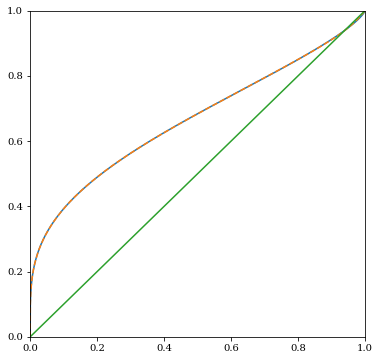

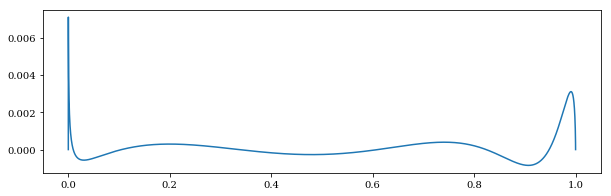

cp.power(p, 0.05)*0.0 + cp.power(p, 0.1)*0.13635 + cp.power(p, 0.35)*0.60041 + cp.power(p, 0.4)*0.0 + cp.power(p, 0.95)*0.14366 + cp.power(p, 3.0)*0.08852 + cp.power(p, 23.0)*0.03107


In [51]:
import cvxpy as cp
import numpy as np

def w(p,alpha=1,delta=0.75):
    return np.exp(-alpha*(-np.log(p))**delta)


# Problem data
x = np.linspace(0,1,10000)
y = w(x,alpha=0.5)

# Constructing the problem
a1 = cp.Variable(1)
a2 = cp.Variable(1)
a3 = cp.Variable(1)
a4 = cp.Variable(1)
a5 = cp.Variable(1)
a6 = cp.Variable(1)
a7 = cp.Variable(1)

powers = np.array([0.05,0.1,0.35,0.4,0.95,3,23])
coefs = cp.Variable(len(powers))

# coefs = [a1.value,a2.value,a3.value,a4.value,a5.value,a6.value,a7.value]

aux = x.reshape(-1,1)**powers.reshape(1,-1)

print(aux.shape)

objective_f = cp.sum_squares(cp.matmul(aux,coefs) - y)

objective = cp.Minimize(objective_f)
constraints = [cp.sum(coefs) == 1, coefs>=0]
prob = cp.Problem(objective,constraints)


# The optimal objective value is returned by `prob.solve()`.
result = prob.solve(solver=cp.SCS, eps=1e-10)
# The optimal value for x is stored in `x.value`.





def approximation(x):
#     r = 5
    return np.matmul(x.reshape(-1,1)**powers.reshape(1,-1),coefs.value)
#     return x**0.05*round(a1.value[0],r) + x**0.1*round(a2.value[0],r) + x**0.35*round(a3.value[0],r) + np.power(x, 0.4)*round(a4.value[0],r) + np.power(x, 0.95)*round(a5.value[0],r) + np.power(x, 3)*round(a6.value[0],r) + np.power(x, 23)*round(a7.value[0],r)


plt.figure(figsize=(6,6))
plt.plot(x, y)
plt.plot(x, approximation(x),ls="dashed")
plt.plot(x,x)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(x, approximation(x) - y)
plt.show()



expression = ""
for n,(c,p) in enumerate(zip(coefs,powers)):
    expression += f"cp.power(p, {p})*{round(c.value,5)}" #cp.power(p, {j})*{i}
    if n < len(powers)-1:
        expression += " + "
        
print(expression)

In [16]:
sum(coefs)

array([1.])

In [38]:
x = np.linspace(0,1,10000)

powers = np.array([0.05,0.1,0.35,0.4,0.95,3,23])

print(x.shape,powers.shape)

(x.reshape(-1,1)**powers.reshape(1,-1)).shape

(10000,) (7,)


(10000, 7)